In [1]:
import numpy as np # linear algebra
import pandas as pd # data manupulation
import warnings
warnings.filterwarnings('ignore')

##  Understanding the data:

In [2]:
# 4.1. Import library: 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import plotly.express as px

from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Restaurent Dataset Reference -
https://www.kaggle.com/datasets/vigneshwarsofficial/reviews

In [3]:
df=pd.read_csv("Restaurant_Reviews.tsv",delimiter="\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [5]:
df.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [6]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [7]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [8]:
len(df['Review'].loc[0])

24

In [9]:
l=[]
for i in range(len(df)):
    l.append(len(df['Review'].loc[i]))

In [10]:
max(l)

149

In [11]:
df['Review'].loc[0]

'Wow... Loved this place.'

In [12]:
len(df['Review'].loc[0])

24

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Liked,1000.0,0.5,0.50025,0.0,0.0,0.5,1.0,1.0


In [15]:
df['sentiment']=df['Liked']

In [16]:
df=df[['Review','sentiment']]

## 4.2. EDA and DATA PREPROCESSING:

## EDA:

In [17]:
#sentiment count: 
df['sentiment'].value_counts()

sentiment
1    500
0    500
Name: count, dtype: int64

Our dataset set is balanced. Next, We’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the review.

<Axes: >

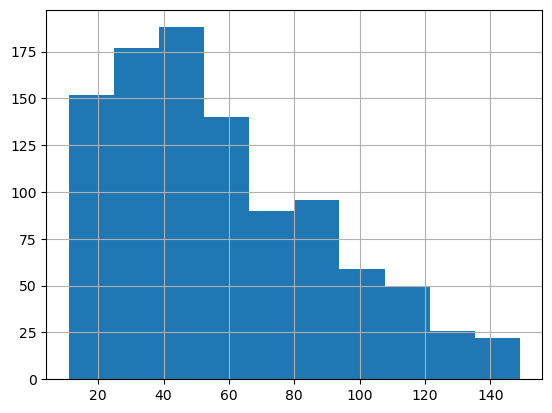

In [18]:
df['Review'].str.len().hist()


1) Character Range in Reviews: The histogram shows that the number of characters in the reviews generally falls between 20 and 140 characters.
2) Most Common Review Length: The highest frequency of reviews occurs between 40 and 60 characters, indicating that most reviews are of this length.
3) Fewer Short and Long Reviews: There are fewer reviews with less than 20 characters or more than 120 characters.
4) Decreasing Frequency for Longer Reviews: As the number of characters increases beyond 60, the number of reviews gradually decreases.

Now, we will move on the histogram for positive review and negative review respectively. Let's plot!

Text(0.5, 1.0, 'Negative Reviews')

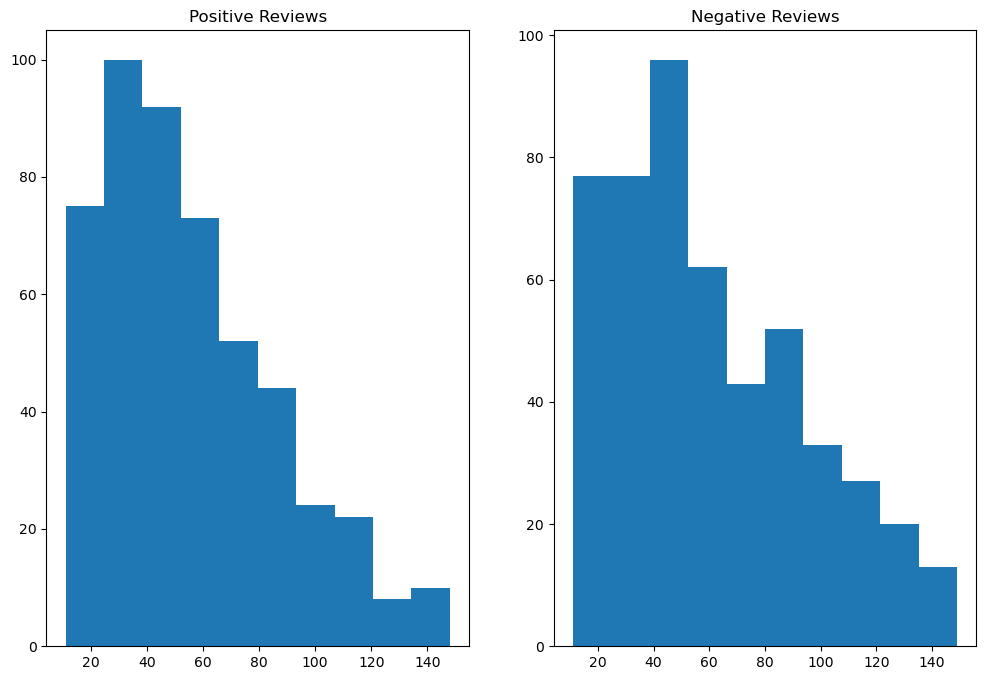

In [19]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
ax1.hist(df[df['sentiment']==1]['Review'].str.len())
ax1.set_title( 'Positive Reviews')
ax2.hist(df[df['sentiment']==0]['Review'].str.len())
ax2.set_title( 'Negative Reviews')

we can observe some insights from the graph above: 
- In general, people comment less word in the positive review to compare with negative review
- However the range of word for positive review are bigger than the range of negative review. It means in some cases, people give a long comments for excellent and people could less critise for bad 

Before we move on to the next section: data preprocessing to clean the text data, we will make a wordcloud graph to show the most used words in large font and the least used words in small font in positive review and negative review

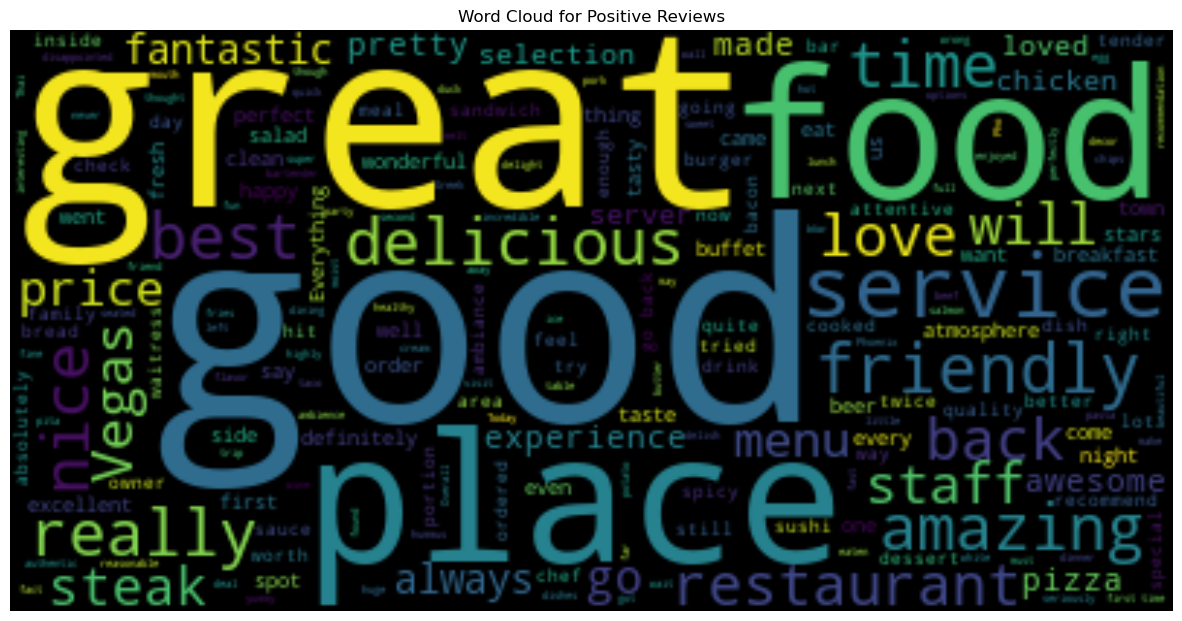

In [20]:
text = " ".join(i for i in df[df['sentiment']==1]['Review'])
wordcloud = WordCloud(background_color="black").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Positive Reviews')
plt.show()

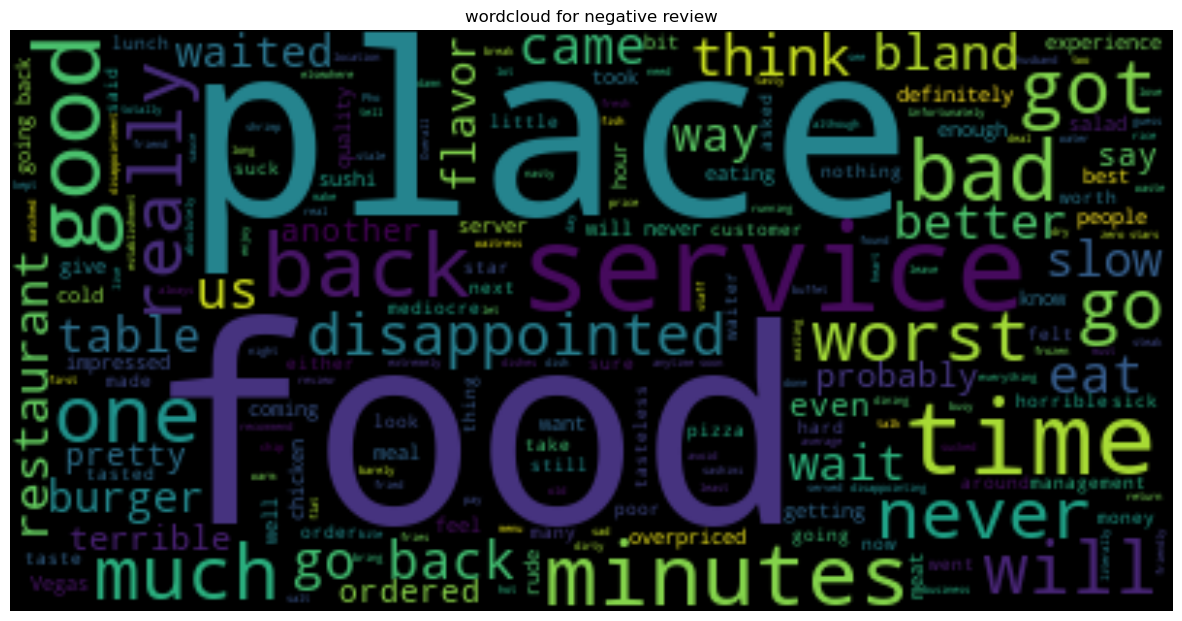

In [21]:
text = " ".join(i for i in df[df['sentiment']==0]['Review'])
wordcloud = WordCloud( background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for negative review')
plt.show()

The wordcloud graphs in both negative and postitive comments don't show meaningful result. 

That's is the reason why text preprosessing is needed. 

Let's start the preproceesing process. 

## PREPROCESSING:

In [22]:
df.rename(columns={'Review':'text'}, inplace = True)
df

,text,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [23]:
def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower() # converting to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL links
    text = re.sub(r"\b\d+\b", "", text) # removing number 
    text = re.sub('<.*?>+', '', text) # removing special characters, 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)
   
    #removing emoji: 
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)   

   # removing short form: 
    
    text=re.sub("isn't",'is not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that´s",'that is',text)
    text=re.sub("I´m",'I am',text)
    text=re.sub("it’s",'it is',text)
    text=re.sub("she´s",'she is',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('I’m','I am',text)
    text=re.sub('I’d','I did',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('there’s','there is',text)
    
     
    return text
    
dt = df['text'].apply(cleaning)

In [24]:
df['sentiment']

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: sentiment, Length: 1000, dtype: int64

In [25]:
dt = pd.DataFrame(dt)  
dt['sentiment']=df['sentiment']
dt.head()

,text,sentiment
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


In [26]:
dt['text'].head()

0                                 wow loved this place
1                                    crust is not good
2             not tasty and the texture was just nasty
3    stopped by during the late may bank holiday of...
4    the selection on the menu was great and so wer...
Name: text, dtype: object

In [27]:
df.head()

,text,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [28]:
#stop word removal :

from nltk.corpus import stopwords
import re

corpus = []
stopwords_set = set(stopwords.words('english'))

for i in range(0, len(dt)):
    review = re.sub('[^a-zA-Z]', ' ', dt['text'][i])  # Assuming 'text' is the column with the text data
    review = review.lower()
    review = review.split()
    
    review = [word for word in review if not word in stopwords_set]
    review = ' '.join(review)
    corpus.append(review)

# remove stop word: 
dt['no_sw'] = dt['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords_set]))

In [29]:
#Working with the most Frequent Words: 
from collections import Counter
cnt = Counter()
for text in dt["no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

,word,count
0,food,124
1,place,106
2,good,95
3,service,83
4,great,70
5,back,61
6,like,46
7,go,43
8,time,42
9,really,36


In [30]:
px.bar(temp, x="count", y="word", title='Commmon Words in Text', orientation='h', 
             width=700, height=700)


In [31]:
# Remove the most frequent words:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
dt["wo_stopfreq"] = dt["no_sw"].apply(lambda text: remove_freqwords(text))
dt.head()

,text,sentiment,no_sw,wo_stopfreq
0,wow loved this place,1,wow loved place,wow loved
1,crust is not good,0,crust good,crust
2,not tasty and the texture was just nasty,0,tasty texture nasty,tasty texture nasty
3,stopped by during the late may bank holiday of...,1,stopped late may bank holiday rick steve recom...,stopped late may bank holiday rick steve recom...
4,the selection on the menu was great and so wer...,1,selection menu great prices,selection menu prices


In [32]:
dt['no_sw'].loc[5]

'getting angry want damn pho'

In [33]:
dt['wo_stopfreq'].loc[5]

'getting angry want damn pho'

# ☆ 
The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors. thats why we are using lemmatization here now

# Lemmatization

In [34]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

#if we just lemmatize the word without pos_tagging,the word like "running" would always be "running",whereas with pos_tagging, it could be lemmatized to "run" if it's determined to be a verb.
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""  # It returns the first character of the POS tag. like n' for noun, 'v' for verb, 'j' for adjective, or 'r' for adverb
    tag = nltk.pos_tag([word])[0][1][0].upper() #nltk.pos_tag() function gives detailed and can be tags like 'NN' for noun, 'VB' for verb, 'JJ' for adjective, and 'RB' for adverb.

    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

#so, the purpose of get_wordnet_pos() function is to map these detailed POS tags to the simpler format that lemmatize() accepts. It does this by taking the first character of the detailed POS tag ('N', 'V', 'J', or 'R') and mapping it to the corresponding string that lemmatize() accepts ('n', 'v', 'a', 'r'). If the first character is not one of these, it defaults to 'n' (noun).

lemmatizer = WordNetLemmatizer()

def lemmatize(word_list):
    return ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in word_list])

dt['wo_stopfreq_lem'] = dt['wo_stopfreq'].str.split().apply(lemmatize)
#Lemmatization is the process of converting a word to its base form. 

dt.head()   

,text,sentiment,no_sw,wo_stopfreq,wo_stopfreq_lem
0,wow loved this place,1,wow loved place,wow loved,wow love
1,crust is not good,0,crust good,crust,crust
2,not tasty and the texture was just nasty,0,tasty texture nasty,tasty texture nasty,tasty texture nasty
3,stopped by during the late may bank holiday of...,1,stopped late may bank holiday rick steve recom...,stopped late may bank holiday rick steve recom...,stop late may bank holiday rick steve recommen...
4,the selection on the menu was great and so wer...,1,selection menu great prices,selection menu prices,selection menu price


# 4.3. Tokenization

In [35]:
# create the cleaned data for the train-test split:-
nb=dt.drop(columns=['text','no_sw', 'wo_stopfreq'])     #dropped all the review column and kept the wo_stopfreq_lem column. 
nb.columns=['sentiment','review']                       #Then, I've renamed wo_stopfreq_lem to review.
nb

,sentiment,review
0,1,wow love
1,0,crust
2,0,tasty texture nasty
3,1,stop late may bank holiday rick steve recommen...
4,1,selection menu price
...,...,...
995,0,think flavor texture lack
996,0,appetite instantly go
997,0,overall impressed would
998,0,whole experience underwhelming think well ninj...


In [36]:
print(nb['sentiment'].unique())

[1 0]


# 4.4. Train-test Split: 

In [37]:
# from sklearn.model_selection import train_test_split
# X=text_counts
# y=nb['sentiment'] 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

----------

In [38]:
#

In [39]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.lower())
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [40]:
texts=list(df['text']) 
sentiment=list(df['sentiment'])   #----------------- is it okay to use df as we have used nb above?

clean_texts = [preprocess_text(text) for text in texts]

# TF-IDF: Term Frequency-Inverse Document Frequency

In [41]:
from tensorflow.keras.preprocessing.sequence import pad_sequences  
from tensorflow.keras.models import Sequential

In [42]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()  # Adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(clean_texts)

In [43]:
max_len = max([len(text.split()) for text in clean_texts])
padded_sequences = pad_sequences(tfidf_matrix.toarray(), maxlen=24, padding='post')

tfidf_matrix

<1000x1828 sparse matrix of type '<class 'numpy.float64'>'
	with 5530 stored elements in Compressed Sparse Row format>

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, sentiment, test_size=0.2, random_state=42)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [46]:
tfidf_vectorizer

TfidfVectorizer()

In [47]:
import pickle

with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

# Applying Models

In [48]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [49]:
# Support Vector Machine
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print("SVM Accuracy: ", accuracy_score(y_test, svm_predictions))

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, logistic_predictions))

# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
print("XGBoost Accuracy: ", accuracy_score(y_test, xgb_predictions))

SVM Accuracy:  0.775
Logistic Regression Accuracy:  0.77
XGBoost Accuracy:  0.72


# Navies Bayes Modelling:
In this section, we will go through different Navies Bayes Model: ComplementNB, MultinatinominalNB, BernoulliNB and see how accuracy each model can be:


### a) Complement NB model:

In [50]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
CNB = ComplementNB()
CNB.fit(X_train, y_train)

from sklearn import metrics
predicted = CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))


ComplementNB model accuracy is 76.50%
------------------------------------------------
Confusion Matrix:
    0   1
0  71  25
1  22  82
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        96
           1       0.77      0.79      0.78       104

    accuracy                           0.77       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.77      0.76       200



### b) Mutilnominal NB model:

In [51]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 78.50%
------------------------------------------------
Confusion Matrix:
    0   1
0  75  21
1  22  82
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78        96
           1       0.80      0.79      0.79       104

    accuracy                           0.79       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.79      0.79      0.79       200



In [52]:
import pickle

# Save the trained MultinomialNB model
with open('multinomial_nb_model.pkl', 'wb') as file:
    pickle.dump(MNB, file)

### c) Bernoulli NB model:

In [53]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted,y_test)

print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

BernoulliNB model accuracy = 74.50%
------------------------------------------------
Confusion Matrix:
    0   1
0  68  28
1  23  81
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        96
           1       0.74      0.78      0.76       104

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200



# KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

predicted = knn.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('KNN model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

KNN model accuracy is 78.50%
------------------------------------------------
Confusion Matrix:
    0   1
0  72  24
1  19  85
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        96
           1       0.78      0.82      0.80       104

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200



# Roc Curve

0.8571213942307693 0.8220653044871795


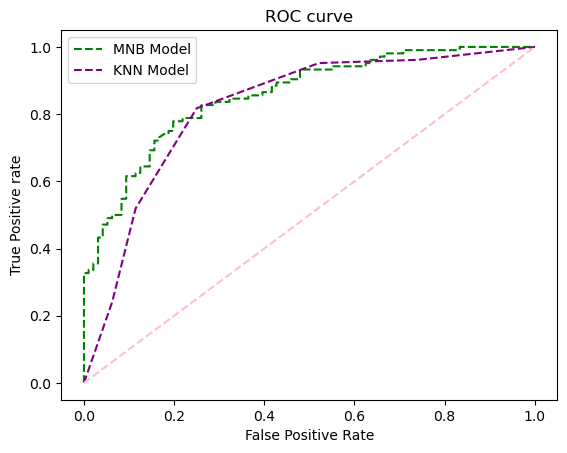

In [55]:
# Create a KNN classifier
knn_model = KNeighborsClassifier()

# Train the KNN classifier
knn_model.fit(X_train, y_train)

from sklearn.metrics import roc_curve


# predict probabilities for MNB and KNN models: 
MNB_prob = MNB.predict_proba(X_test)
knn_prob = knn_model.predict_proba(X_test)  # assuming knn_model is your trained KNN model

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, MNB_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, knn_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
from sklearn.metrics import roc_auc_score
auc_MNB = roc_auc_score(y_test, MNB_prob[:,1])
auc_knn = roc_auc_score(y_test, knn_prob[:,1])
print(auc_MNB, auc_knn)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='green', label='MNB Model')
plt.plot(fpr2, tpr2, linestyle='--',color='purple', label='KNN Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='pink')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In this case, the MNB model has an AUC-ROC of approximately 0.857 and the KNN model has an AUC-ROC of approximately 0.822. This suggests that the MNB model is performing better at distinguishing between the classes compared to the KNN model for the given dataset.

so in this case MultinominalNB model with 78.50% accuracy is the best fit model for the given dataset

# THE END

----------------------------